In [55]:
# General
# ! pip install biosppy
# ! pip install neurokit2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

# ML - Processing, Metrics and Evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
# ML - Models
from sklearn.svm import SVC
import xgboost as xgb

# Custom
import sys,os
sys.path.append( '.' )
sys.path.append( '..' )
import Components.Normalisation as Normalisation
import Components.data_fetching as data_fetching
import Components.Feature_Engineering as Feature_Engineering


# CAREFUL:
# If you make changes to a custom module, you have to reload it, i.e rerun this cell
import importlib
importlib.reload(Normalisation)
importlib.reload(data_fetching)
importlib.reload(Feature_Engineering)

<module 'Components.Feature_Engineering' from '../Components/Feature_Engineering.py'>

# Data Fetching

In [56]:
# TODO


# X, y = data_fetching.get_engineered_train_data()
# X = StandardScaler().fit_transform(X)

# Data Processing

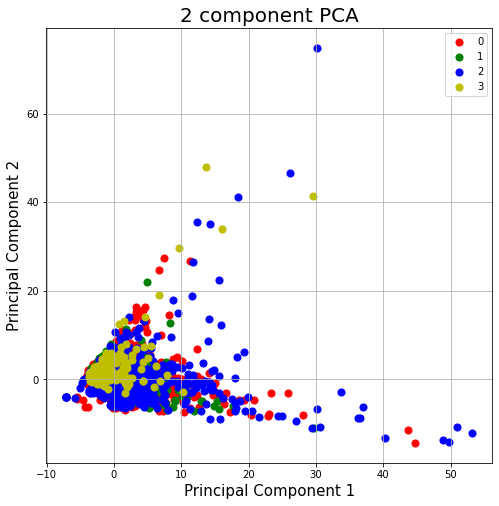

In [60]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(principalComponents, columns=['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, y], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2,3]
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf.y == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

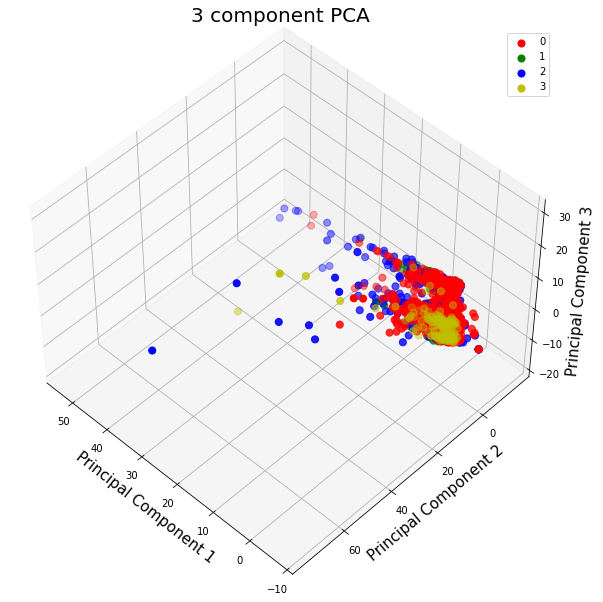

In [59]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(principalComponents, columns=['principal component 1', 'principal component 2', 'principal component 3'])

finalDf = pd.concat([principalDf, y], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = [0,1,2,3]
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf.y == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()